<a href="https://colab.research.google.com/github/jnsbrdbr/new_thesiis/blob/main/99.2_TUGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-rc0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0


In [2]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install --upgrade tables

In [5]:
!pip3 install pickle5
import pickle5 as pickle

In [6]:
with open('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [7]:
#final data
print(result)

             0         1         2         3         4          5         6  \
0    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
1    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
2    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
3    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
4    -0.018444 -4.221080 -0.916678 -0.715889 -0.869072  -1.349276 -0.475212   
...        ...       ...       ...       ...       ...        ...       ...   
9995 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9996 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9997 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9998 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9999 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   

             7         8         9  ...          1 

In [8]:
#divide data in to data_label and non_data label

y=result.label
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(y)):
  if y[i]==1:
    y[i]=0
  else:
    y[i]=1

In [9]:
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel

In [10]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,shuffle=True,test_size=0.3)#random_state=42

In [11]:
print('shape of x_train is:',X_train.shape)
print('shape of x_test is:',X_test.shape)

shape of x_train is: (7000, 100)
shape of x_test is: (3000, 100)


In [12]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [13]:
make_latent_samples(1, 100) # generates one sample

array([[ 0.54941673,  0.61985558, -0.61522432,  0.21127365, -0.49019157,
         1.14840213, -2.48771287, -0.03473548,  1.29878046,  0.54364904,
        -0.40122814, -1.0718323 ,  1.13955557, -1.63466226, -1.24264953,
         0.57793276,  0.30720438, -0.50841342,  0.45768175,  0.39510586,
        -0.58796931,  0.27018256,  1.20609411,  0.29999205,  0.05219108,
        -0.02098407,  0.49463413,  0.22889357,  0.85403844, -0.25640698,
         0.60235615, -0.20328523, -1.47536398,  0.03726278, -0.97069646,
         0.16788248,  0.93232104, -0.09113781, -1.51668642,  1.04039875,
         0.1268633 , -0.49648075, -0.24202903, -0.53751533, -0.71332604,
         0.85913274, -0.27824892,  2.04393341, -0.88856684,  0.85211692,
        -2.08957915, -0.36205227, -0.30946312,  0.25100072, -0.67802693,
        -0.45483238, -0.17756055,  0.45389727, -2.77545281, -1.52532341,
         0.0699047 , -0.67451484,  0.14454053, -0.46855248,  1.61528049,
        -1.10021102,  0.50083567, -0.99352947, -1.6

In [14]:
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.7),

    #Dense(100),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(1024),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(2048),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(100),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
Total params: 26,340
Trainable params: 26,084
Non-trainable params: 256
___________________________________________________

In [15]:
discriminator = Sequential([
    Dense(64, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(32),
    LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(128),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),
    #Dense(64),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(32),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(16),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-train

In [16]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 100)               26340     
                                                                 
 discriminator (Sequential)  (None, 1)                 8577      
                                                                 
Total params: 34,917
Trainable params: 34,661
Non-trainable params: 256
_________________________________________________________________


In [17]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [18]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 0
Non-trainable

In [19]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-train

In [20]:
def make_simple_GAN(sample_size, 
                    g_hidden_size_1,
                    g_hidden_size_2,
                    g_hidden_size_3,
                    g_hidden_size_4,
                    d_hidden_size_1,
                    d_hidden_size_2, 
                    d_hidden_size_3,
                    d_hidden_size_4,
                    d_hidden_size_5,
                    d_hidden_size_6,
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size_1, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_2),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(100),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size_1, input_shape=(100,)),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(d_hidden_size_2),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_5),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_6),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(learning_rate=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(learning_rate=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 

In [21]:
from sklearn import preprocessing
def preprocess(x):
   x = preprocessing.scale(x)
   return x

In [22]:
X_train_real = np.array(preprocess(X_train))
X_test_real  = np.array(preprocess(X_test))

In [23]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [24]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [25]:
# hyperparameters
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size_1 = 128
g_hidden_size_2 = 0
g_hidden_size_3 = 0
g_hidden_size_4 = 0
d_hidden_size_1 = 64
d_hidden_size_2 = 32
d_hidden_size_3 = 0
d_hidden_size_4 = 0
d_hidden_size_5 = 0
d_hidden_size_6 = 0
leaky_alpha     = 0.2
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.0001   # learning rate for the discriminator
epochs          = 100
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1


In [26]:
## labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size_1, 
    g_hidden_size_2,
    g_hidden_size_3,
    g_hidden_size_4, 
    d_hidden_size_1, 
    d_hidden_size_2,
    d_hidden_size_3,
    d_hidden_size_4,
    d_hidden_size_5,
    d_hidden_size_6,
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)


losses = []
losses1 = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
   # evaluate
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))

    d_acc_real = discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
    d_acc_fake = discriminator.train_on_batch(X_batch_fake, y_train_fake)
    d_acc  = 0.5 * (d_acc_real + d_acc_fake)

    #losses1.append(( d_acc))
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f} Discriminator acc:{:>6.4f}:".format(
        e+1, epochs, d_loss, g_loss,d_acc)) #Discriminator acc: {:>6.4f}:,d_acc

Epoch:   1/100 Discriminator Loss: 1.4706 Generator Loss: 0.3998 Discriminator acc:0.8181:
Epoch:   2/100 Discriminator Loss: 1.5733 Generator Loss: 0.3189 Discriminator acc:0.8562:
Epoch:   3/100 Discriminator Loss: 1.6160 Generator Loss: 0.3409 Discriminator acc:0.8508:
Epoch:   4/100 Discriminator Loss: 1.6693 Generator Loss: 0.3145 Discriminator acc:0.9011:
Epoch:   5/100 Discriminator Loss: 1.6037 Generator Loss: 0.3225 Discriminator acc:0.9057:
Epoch:   6/100 Discriminator Loss: 1.6428 Generator Loss: 0.3080 Discriminator acc:0.9229:
Epoch:   7/100 Discriminator Loss: 1.6292 Generator Loss: 0.3096 Discriminator acc:0.8902:
Epoch:   8/100 Discriminator Loss: 1.5797 Generator Loss: 0.3242 Discriminator acc:0.8732:
Epoch:   9/100 Discriminator Loss: 1.7518 Generator Loss: 0.2848 Discriminator acc:0.8359:
Epoch:  10/100 Discriminator Loss: 1.6820 Generator Loss: 0.3167 Discriminator acc:0.8915:
Epoch:  11/100 Discriminator Loss: 1.7021 Generator Loss: 0.3068 Discriminator acc:0.8976:

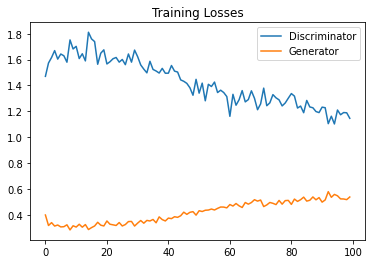

In [27]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [28]:
rr = discriminator.predict_on_batch(X_test_real)

In [29]:
import keras
#import keras_metrics

r = tf.keras.metrics.Recall()#thresholds=rr.min())
r.update_state(y_test,rr )
r.result().numpy()


1.0

In [30]:
p=tf.keras.metrics.Precision()#thresholds=rr.min())
p.update_state(y_test,rr )
p.result().numpy()

0.009342676

In [31]:
import keras
#import keras_metrics

a = tf.keras.metrics.BinaryAccuracy()#thresholds=rr.min())
a.update_state(y_test,rr )
a.result().numpy()

0.010333333